#Coffee and Code
by : Ihsanny Widyasari

Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

DATA

Having a cup of coffee by your side while doing job has become part of a habit. Drinking the right amount of coffee can help increase focus. According to the Acceptable Daily Intake (ADI), the limit for caffeine consumption is 400 milligrams a day, that's about four or five cups of coffee.

This dataset provides information about coffee lovers and code developers in Lebanon and provides interesting data points from fields like -CodingHours, CoffeeCupsPerDay, CoffeeTime, CoffeeSolveBugs and Gender

In [35]:
df = pd.read_csv('/content/drive/MyDrive/Food data/archive (4)/CoffeeAndCodeLT2018 - CoffeeAndCodeLT2018.csv')
df

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
...,...,...,...,...,...,...,...,...,...
95,6,2,Before coding,Yes,Nescafe,Yes,Male,Lebanon,18 to 29
96,4,1,Before coding,Sometimes,Nescafe,Sometimes,Female,Lebanon,18 to 29
97,10,3,Before coding,Yes,Cappuccino,Yes,Male,Lebanon,Under 18
98,2,2,While coding,Sometimes,Espresso (Short Black),Sometimes,Female,Lebanon,18 to 29


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CodingHours          100 non-null    int64 
 1   CoffeeCupsPerDay     100 non-null    int64 
 2   CoffeeTime           100 non-null    object
 3   CodingWithoutCoffee  100 non-null    object
 4   CoffeeType           99 non-null     object
 5   CoffeeSolveBugs      100 non-null    object
 6   Gender               100 non-null    object
 7   Country              100 non-null    object
 8   AgeRange             98 non-null     object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [37]:
df.head(5)

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


In [6]:
df.sample(5)

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
53,3,3,While coding,No,Turkish,No,Male,Lebanon,18 to 29
91,5,3,While coding,Sometimes,Turkish,Sometimes,Female,Lebanon,18 to 29
6,5,2,While coding,Yes,Nescafe,Sometimes,Male,Lebanon,NaN
28,7,1,Before coding,Yes,Nescafe,Yes,Male,Lebanon,30 to 39
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


Missing Values Handling

In [7]:
# number of missing values per column
df.isna().sum()

CodingHours            0
CoffeeCupsPerDay       0
CoffeeTime             0
CodingWithoutCoffee    0
CoffeeType             1
CoffeeSolveBugs        0
Gender                 0
Country                0
AgeRange               2
dtype: int64

In [8]:
#drop missing value
df = df.dropna()

Duplicated Handling

In [9]:
# sample duplicated rows
df[df.duplicated(keep=False)].sort_values('CodingHours')

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
49,6,1,Before coding,Yes,Nescafe,No,Male,Lebanon,30 to 39
50,6,1,Before coding,Yes,Nescafe,No,Male,Lebanon,30 to 39
27,8,4,While coding,Sometimes,Turkish,Yes,Male,Lebanon,30 to 39
41,8,4,While coding,Sometimes,Turkish,Yes,Male,Lebanon,30 to 39
10,10,3,While coding,Sometimes,American Coffee,Sometimes,Male,Lebanon,30 to 39
16,10,3,While coding,Sometimes,American Coffee,Sometimes,Male,Lebanon,30 to 39


In [10]:
#drop duplicate
df = df.drop_duplicates()

DATA UNDERSTANDING

In [11]:
# group column names based on type
# it will make our life easier onwards
df_numericals = ['CodingHours', 'CoffeeCupsPerDay']
df_categoricals = ['CoffeeTime', 'CodingWithoutCoffee', 'CoffeeType', 'CoffeeSolveBugs', 'Gender', 'Country', 'AgeRange']

In [12]:
df[df_numericals].describe()

,CodingHours,CoffeeCupsPerDay
count,94.000000,94.000000
mean,6.319149,2.882979
std,2.660798,1.612161
min,1.000000,1.000000
25%,4.000000,2.000000
50%,7.000000,2.500000
75%,8.000000,4.000000
max,10.000000,8.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



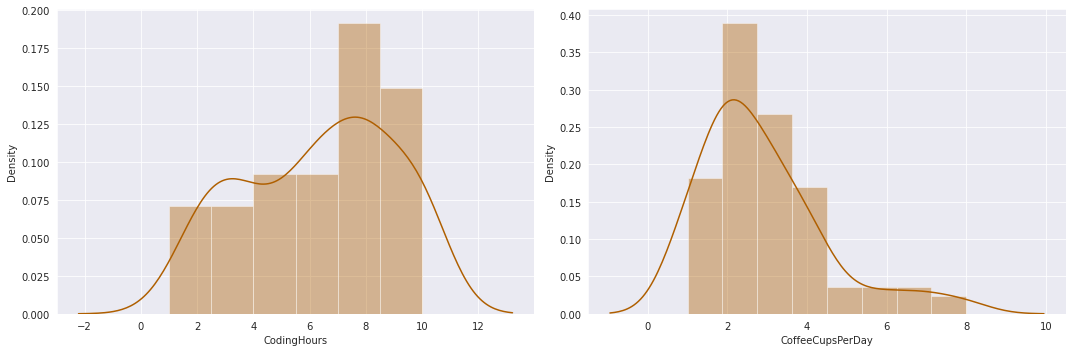

In [18]:
#KDE Plot for knowing distribution
features = df_numericals
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
for i in range(0, len(features)):
    #plt.subplot(2, len(features)//2, i+1)
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='#af5f00')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation : 
1. Overall, the minimum and maximum values make sense for each column
2. Mean ~ Median in `CodingHours` and `CoffeeCupsPerDay` columns, indicating somewhat a symmetrical distribution
3. we also get information that the average person coding for 6-7 hours and the average person drinks coffee about 2-3 cups per day

In [19]:
df[df_categoricals].describe()

,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
count,94,94,94,94,94,94,94
unique,7,3,8,3,2,1,5
top,While coding,Sometimes,Nescafe,Sometimes,Male,Lebanon,18 to 29
freq,57,48,29,41,68,94,59


Observation :
Most of the data have > 2 unique values

In [21]:
# showing the precise value counts
for col in df_categoricals[1:]:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of CodingWithoutCoffee column
Sometimes    48
Yes          28
No           18
Name: CodingWithoutCoffee, dtype: int64 

Value counts of CoffeeType column
Nescafe                     29
American Coffee             22
Turkish                     18
Espresso (Short Black)       8
Cappuccino                   7
Caffè latte                  5
Double Espresso (Doppio)     3
Americano                    2
Name: CoffeeType, dtype: int64 

Value counts of CoffeeSolveBugs column
Sometimes    41
Yes          28
No           25
Name: CoffeeSolveBugs, dtype: int64 

Value counts of Gender column
Male      68
Female    26
Name: Gender, dtype: int64 

Value counts of Country column
Lebanon    94
Name: Country, dtype: int64 

Value counts of AgeRange column
18 to 29    59
30 to 39    26
40 to 49     6
Under 18     2
50 to 59     1
Name: AgeRange, dtype: int64 



UNIVARIATE ANALYSIS

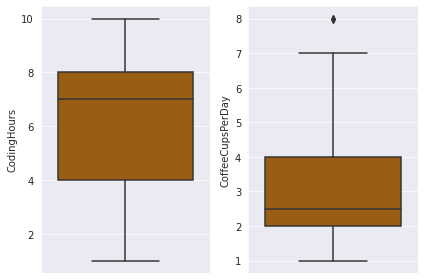

In [23]:
#Boxplot to detect outliers
features = df_numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='#af5f00')
    plt.tight_layout()

In [38]:
df['CoffeeCupsPerDay'].value_counts()

2    34
3    23
1    16
4    15
6     4
7     3
5     3
8     2
Name: CoffeeCupsPerDay, dtype: int64

Observation : 
There is outlier in `CoffeeCupsPerDay` column, it is > 7 cups of coffee per day and it's still make sense

MULTIVARIATE ANALYSIS

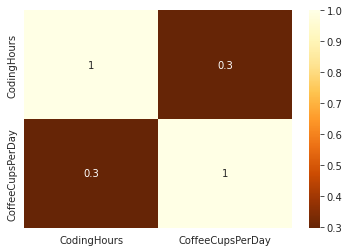

In [32]:
#heatmap correlation
color_map = plt.cm.get_cmap('YlOrBr')
reversed_color_map = color_map.reversed()

correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap=reversed_color_map)

Observation :    
correlation between `CodingHours` and `CoffeeCupsPerDay` is 0.3, not very correlated

Plot for knowing frequency of each column

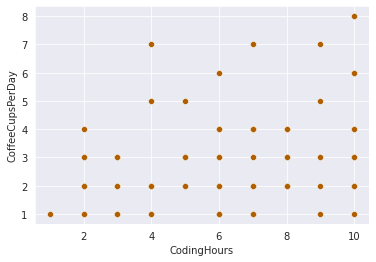

In [39]:
sns.scatterplot(data=df, x='CodingHours', y='CoffeeCupsPerDay', color='#af5f00')

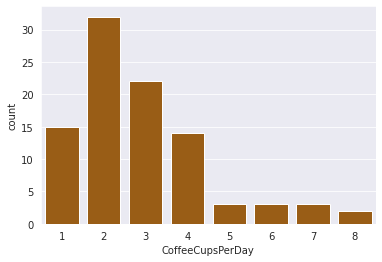

In [27]:
#Plot for knowing frequency of each column
sns.set_style('darkgrid')
sns.countplot(data=df,
            x='CoffeeCupsPerDay', color='#af5f00')

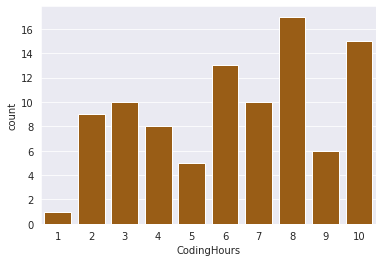

In [28]:
sns.countplot(data=df, x='CodingHours', color='#af5f00')

Observations :    
1. Most people drink 2 cups of coffee
2. Most of the people code for 8 hours
3. People who code 10 hours can drink up to 8 cups of coffee

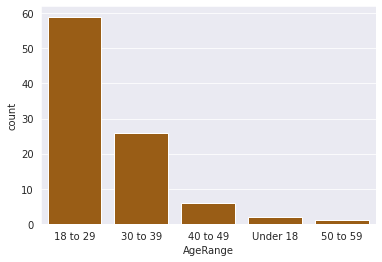

In [33]:
sns.countplot(data=df,
            x='AgeRange', color='#af5f00')

Most of people who code are between 18 to 29 years old


In [42]:
px.bar(df, x = 'CodingWithoutCoffee' ,y = 'CoffeeCupsPerDay',color = 'CoffeeTime',
       title = "<b>Coffee Type wise Analyzing</b>",template="plotly_dark")

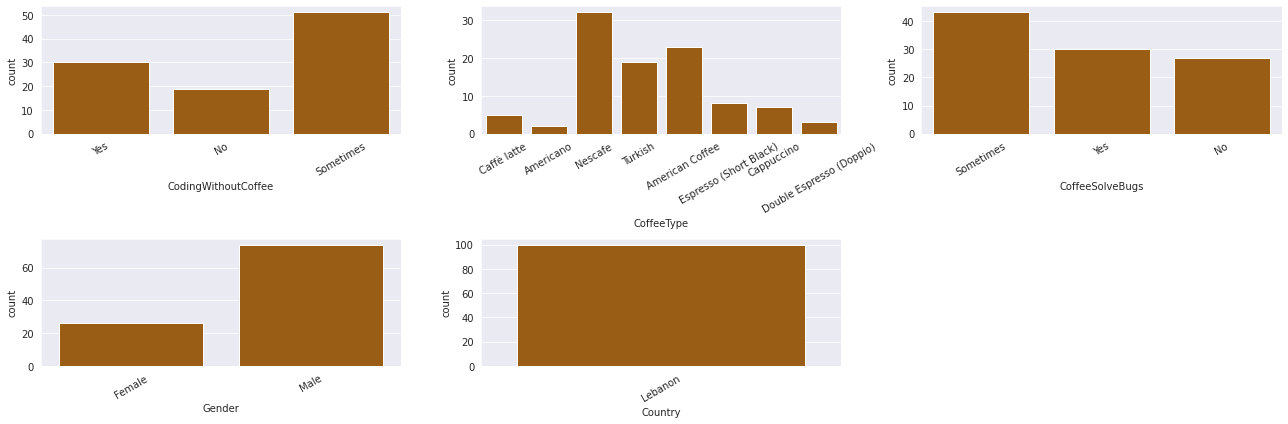

In [40]:
features = df_categoricals[1:-1] 
plt.figure(figsize=(18,6))
for i in range(0, len(features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df,
            x=features[i], color='#af5f00')
    plt.xticks(rotation=30)
    plt.tight_layout()

Observations :    
1. Most people sometimes code without coffee, and those who drink coffee do it while coding
2. Most of the people sometimes solved bugs while drinking coffee, drinking coffee solves more bugs than not drinking coffee
3. Nescafe is coffee that often drunk
4. Data consists most of males

Source : 

https://www.kaggle.com/shrutikunapuli/coffee-and-code-dataset 

https://www.fda.gov/consumers/consumer-updates/spilling-beans-how-much-caffeine-too-much 